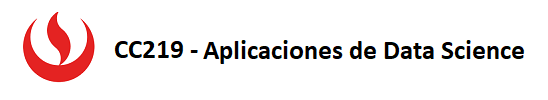

<h3 align="center"><b>TA4:</b> Visión Computacional - Clasificación de imágenes </h3>
<h3 align="center">2023-2</h3>

---

**Nombre del Alumno:** Luis Felipe Poma Astete 

**Código:**  u202110902

---

## **1. Modelo de Clasificación de imágenes**

La clasificación de imágenes es una de las aplicaciones más populares de la visión por computadora y un concepto imprescindible para cualquiera que desee desempeñar un papel en este campo.

En este ejercicio debemos entrenar una red neuronal convolucional (CNN) con datos de imagenes de dos tipos: imagenes de futbol (futbol) e imagenes de futbol americano (futbolA).  Estas imagenes provienen de dos fuentes de datos: ImageNet y Google OpenImages.

Son un total de 3058 imágenes.

**Conjunto de entrenamiento:**

2448 imágenes (1224 imágenes de soccer y 1224 imagenes de rugby)

**Conjunto de prueba:**

610 imagenes (305 imágenes de soccer y 305 imagenes de rugby)

Para simplificar nuestro ejercicio, el conjunto de datos adjunto solo contiene **50 imagenes**, distribuidas en dos carpetas: train y test.  En cada carpeta las imagenes se encuentran separadas por su tipo: **futbol** y **futbolA** (que deberá considerar como las etiquetas).

Para desarrollar cada uno de los pasos para la construcción de este modelo de clasificacion de imagenes puede tomar como guia el notebook **11_02_Clasificador_de_Imagenes_Fashion_MNIST.ipynb**

Los pasos para la contrucción del modelo son los siguientes:

- **Paso 1:** Importar librerias necesarias
- **Paso 2:** Cargar los datos
- **Paso 3:** Visualizar los datos
- **Paso 4:** Preprocesamiento de datos
- **Paso 5:** Definir el modelo
- **Paso 6:** Evaluar el resultado




### **Paso 1:** Importar librerias necesarias

In [1]:
#Considere las siguientes librerias base

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

import numpy as np
import pandas as pd


### **Paso 2:** Cargar los datos

In [2]:
# Para nuestro ejercicio, solo considedaremos 50 imagenes (40 para entrenamiento y 20 para pruebas), 80% y 20% respectivamente
# Descarge el archivo data.zip

# train and test data directory
train_dir = "data/train"
test_dir = "data/test"

LABEL_0 = "futbolA"
LABEL_1 = "futbol"
LABELS = [LABEL_0, LABEL_1]
# Para el tratamiento de las imagenes:
# (1) Leer las imágenes en formato RGB
# (2) Cambiar el ancho y alto tamaño de las imágenes a 224
# (3) Considerar la etiqueta como futbol=1 y futbolA=0 segun el nombre del directorio donde se encuentran las imagenes almacenadas
# (4) Puede almacenar las imagenes en un dataframe o trabajarlas solo como arreglos numpy


def load_images_from_folder(folder) -> tuple[np.array, np.array]:
    images: list = []
    labels: list = []
    for i, label in enumerate(LABELS):
        for filename in os.listdir(os.path.join(folder, label)):
            img = cv2.imread(os.path.join(folder, label, filename))
            img = cv2.resize(img, (224, 224))
            if img is not None:
                images.append(img)
                labels.append(i)
    return np.array(images), np.array(labels)

### **Paso 3:** Visualizar los datos

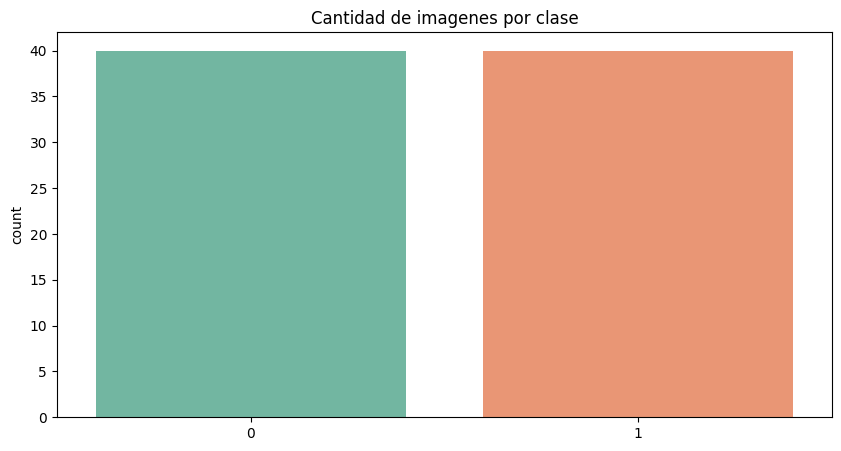

In [3]:
#Datos cargados
images_train, labels_train = load_images_from_folder("data/train")
images_test, labels_test = load_images_from_folder("data/test")

#(1) Visualizar los datos cargados mediante un grafico de barras (futbolA y futbol)
plt.figure(figsize=(10, 5))
sns.countplot([labels_train,labels_train],palette='Set2')
plt.title("Cantidad de imagenes por clase")
plt.show()

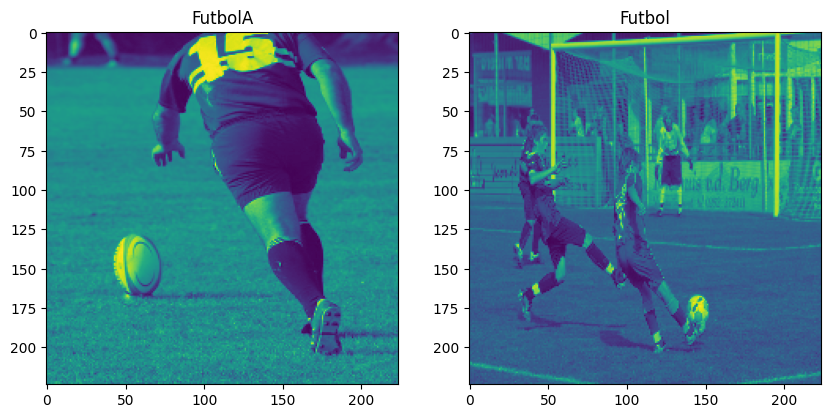

In [31]:
#Visualice una imagen del dataset correspondiente a cada tipo de imagen
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images_train[0])
plt.title("FutbolA")
plt.subplot(1, 2, 2)
plt.imshow(images_train[-1])
plt.title("Futbol")
plt.show()

### **Paso 4:** Preprocesamiento de datos

In [28]:
# Normalize los datos (los arreglos de las imagenes deben estar normalizados, es decir, con valores entre 0-1)
images_train = np.array(images_train) / 255 
images_test = np.array(images_test) / 255

### **Paso 5:** Definir y entrenar el modelo

In [29]:
#Dividir el dataset en entrenamiento (80%) y pruebas (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.2, random_state=42)

In [30]:
# Verificar las dimensiones de las imagenes
# Para las de entrenamiento (x_train): (40, 244, 244, 1)
# y_train (40, )
print(X_train.shape)
print(y_train.shape)
# Para las de prueba (x_test): (10, 244, 244, 1)
# y_test (10, )
print(X_test.shape)
print(y_test.shape)

(32, 224, 224)
(32,)
(8, 224, 224)
(8,)


In [8]:
#Definir un modelo CNN simple con
#3 capas convolucionales Conv2D seguidas de
#3 capa de agrupación máxima MaxPool2D().
#Se agrega una capa de eliminación después de la tercera operación de maxpool para evitar el sobreajuste -> Dropout(0.4)

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,3)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 2 , activation = 'sigmoid'))

d:\Codes\Data_Science_Applications\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Visualizamos la configuracion del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,479,234 (24.72 MB)

 Trainable params: 6,479,234 (24.72 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Compilar el modelo usando Adam como optimizador y SparseCategoricalCrossentropy como función de pérdida.
#Utilizando una tasa de aprendizaje de 0,000001 para obtener una curva más suave -> learning_rate=0.000001
model.compile(optimizer=Adam(learning_rate=0.000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Entrenemos el modelo durante 50 épocas, ya que nuestra tasa de aprendizaje es muy pequeña (probar con 100-500 epocas para mejorar el entranamiento)
history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.5958 - loss: 0.6893 - val_accuracy: 0.3750 - val_loss: 0.7152
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.4892 - loss: 0.7027 - val_accuracy: 0.3750 - val_loss: 0.7145
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 0.5517 - loss: 0.6877 - val_accuracy: 0.3750 - val_loss: 0.7146
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.6967 - loss: 0.6429 - val_accuracy: 0.3750 - val_loss: 0.7159
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.6858 - loss: 0.6666 - val_accuracy: 0.3750 - val_loss: 0.7179
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.5092 - loss: 0.6904 - val_accuracy: 0.3750 - val_loss: 0.7180
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.6050 - loss: 0.6872 - val_accuracy: 0.3750 - val_loss: 0.7175
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.5417 - loss: 0.6901 - val_accuracy: 0.3750 - val_loss:

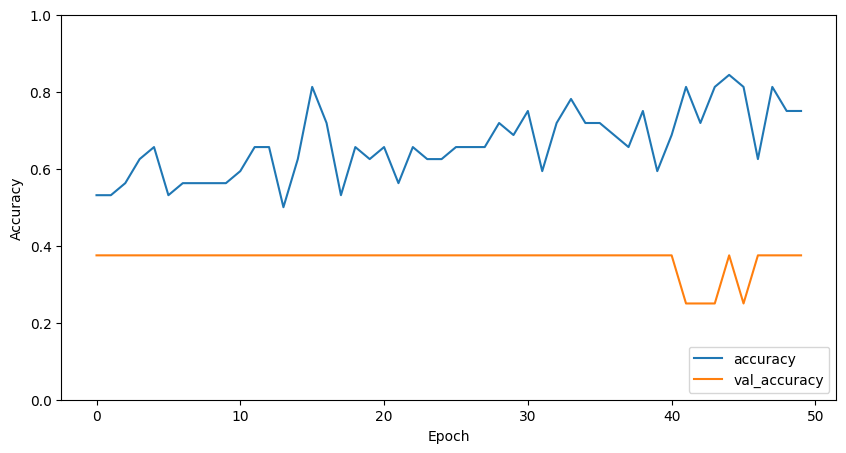

In [12]:
#Visualizar la evolución del modelo durante su entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

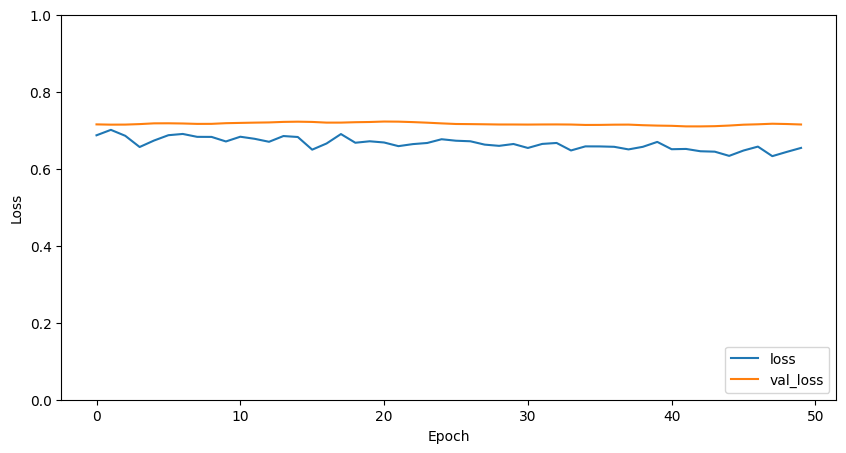

In [17]:
#Visualizar la evolución de la función de pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## **Paso 6:** Evaluar el resultado

**(a) Precisión de la Prueba**

In [20]:
evaluacion = model.evaluate(images_test, labels_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6000 - loss: 0.6905


**(b) Hacer prediccones**

In [21]:
# obtener las predicciones para los datos de prueba
predictions = model.predict(X_test)
# obtener las predicciones en forma de etiquetas
y_pred = np.argmax(predictions, axis=1)
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

**(c) Herramientas para evaluar**

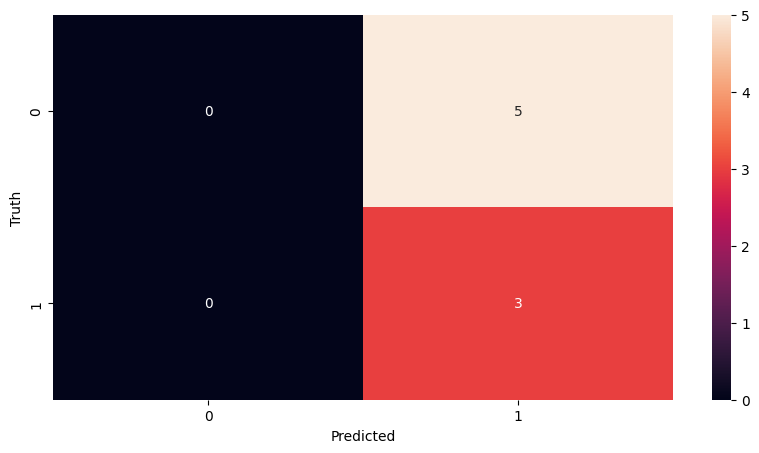

In [22]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [23]:
#Reporte de Clasificación
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=LABELS))

              precision    recall  f1-score   support

     futbolA       0.00      0.00      0.00         5
      futbol       0.38      1.00      0.55         3

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8



d:\Codes\Data_Science_Applications\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Codes\Data_Science_Applications\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Codes\Data_Science_Applications\.env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

### **¿Como resultó su modelo?** Interprete